# Instalando e importando utilidades necesarias

In [ ]:
#Instalando librerias necesarias para la conexion con yahoo finance
!pip install yfinance
!pip install yahoo_fin
!pip install requests-html
!pip install --upgrade yahoo_fin
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=4f074f4bfefcc45ee742b1f075159b7c8e204190b3dbcb19d0a56a95972faa1a
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


# Extracción de datos de opciones

In [ ]:
#Importando librerias
import datetime
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from yahoo_fin import options
import yahoo_fin.stock_info as si

import seaborn as sns



#La siguiente función esta inspirada en el código que se encuentra en este url
# https://medium.com/@txlian13/webscrapping-options-data-with-python-and-yfinance-e4deb0124613
def options_chain(symbol):
    #Se crea objeto correspondiente al activo subyacente de interés
    tk = yf.Ticker(symbol)
    # Se obtiene las fechas de expiración de las opciones que no han expirado
    exps = tk.options
    # Se utiliza la fecha de hoy para usar en el historial
    underlying_price = tk.history(period='1d')['Close'][0]

    # información histórica para el activo subyacente
    # Se obtiene los datos de opciones para cada fecha de expiración posible
    options_df_list = []
    for e in exps:
        #Se obtiene un diccionario de las opciones que corresponden a la fecha de expiracion
        opt = tk.option_chain(e)
        opt = pd.concat([opt.calls,opt.puts])
        opt["expirationDate"] = e
        options_df_list.append(opt)
    options_data = pd.concat(options_df_list, ignore_index=True)
    #Se corrige fecha de expiración
    options_data["expirationDate"] = pd.to_datetime(
        options_data["expirationDate"]
    ) + datetime.timedelta(days=1)
    options_data["days_to_maturity"] = (
        options_data["expirationDate"] - datetime.datetime.today()
    ).dt.days
    options_data["dte"] =  options_data["days_to_maturity"]/365

    options_data["underlying_price"] = underlying_price
    options_data["CALL"] = options_data["contractSymbol"].str[4:].apply(lambda x: "C" in x)

    options_data[["bid", "ask", "strike", "volume", "impliedVolatility"]] = options_data[
        ["bid", "ask", "strike", "volume", "impliedVolatility"]
    ].apply(pd.to_numeric)
    options_data["mark"] = (
        options_data["bid"] + options_data["ask"]
    ) / 2

    # Calculate the midpoint of the bid-ask

    # Drop unnecessary and meaningless columns
    #options_data= options_data.drop(
    #    columns=[
    #        "contractSize",
    #        "currency",
    #        "change",
    #        "percentChange",
    #        "lastTradeDate",
    #        "lastPrice",
    #    ]
    #)

    return options_data



In [ ]:
#import pandas as pd
#import pandas_datareader.data as web
#from datetime import datetime

 #Definir las fechas de inicio y fin para obtener los datos
#start = datetime(2023, 1, 1)
#end = datetime(2023, 12, 31)

# Obtener los datos de los bonos del Tesoro
#try:
#    treasury_yield = web.DataReader('DGS10', 'fred', start, end)
#    print(treasury_yield.head())
#except Exception as e:
#    print("Error al obtener datos de los bonos del Tesoro:", e)
#    treasury_yield = pd.DataFrame()
# Obtener los datos del Índice de Precios al Consumidor (IPC) desde FRED
#try:
#    cpi = web.DataReader('CPIAUCSL', 'fred', start, end)
#    print(cpi.head())
#except Exception as e:
#    print("Error al obtener datos del IPC:", e)
#    cpi = pd.DataFrame()

    # Calcular la tasa de inflación anual (cambio porcentual)
#    inflation_rate = cpi_annual.pct_change().dropna() * 100

    # Resamplear para obtener el valor anual del rendimiento del Tesoro
#    treasury_yield_annual = treasury_yield.resample('A').last()

    # Alinear los datos de rendimiento del tesoro y la inflación por fecha
#    data = pd.concat([treasury_yield_annual, inflation_rate], axis=1).dropna()
#    data.columns = ['Treasury_Yield', 'Inflation_Rate']

    # Calcular la tasa libre de riesgo real (ajustando por inflación)
#    data['Real_Risk_Free_Rate'] = data['Treasury_Yield'] - data['Inflation_Rate']

    # Mostrar los resultados
#    cpi

In [ ]:
#tasa_libre_riesgo = treasury_yield.mean()/100
#tasa_libre_riesgo



# Análisis exploratorio de datos

In [ ]:
#Extrayendo informacion de las opciones cuyo subyacente
sp500_options = options_chain("SPY")

In [ ]:
#dir(sp500_options)
sp500_options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDate,days_to_maturity,dte,underlying_price,CALL,mark
0,SPY240628C00300000,2024-06-24 15:41:06+00:00,300.0,246.36,0.00,0.00,0.0,0.0,26.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
1,SPY240628C00305000,2024-06-24 15:41:32+00:00,305.0,241.36,0.00,0.00,0.0,0.0,120.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
2,SPY240628C00310000,2024-06-24 16:42:27+00:00,310.0,235.84,0.00,0.00,0.0,0.0,34.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
3,SPY240628C00315000,2024-06-21 14:12:14+00:00,315.0,229.47,0.00,0.00,0.0,0.0,32.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
4,SPY240628C00320000,2024-03-19 13:49:58+00:00,320.0,196.63,182.45,183.15,0.0,0.0,4.0,41.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,182.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,SPY261218P00760000,2024-03-01 16:00:48+00:00,760.0,249.30,234.00,239.00,0.0,0.0,1.0,0.0,0.240608,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,236.500
6401,SPY261218P00775000,2024-05-07 17:44:46+00:00,775.0,256.98,238.13,243.00,0.0,0.0,1.0,0.0,0.204041,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,240.565
6402,SPY261218P00780000,2024-05-06 13:43:18+00:00,780.0,265.98,0.00,252.31,0.0,0.0,1.0,0.0,0.224899,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,126.155
6403,SPY261218P00785000,2024-04-03 13:36:19+00:00,785.0,266.70,271.39,276.00,0.0,0.0,1.0,0.0,0.296043,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,273.695


In [ ]:
sp500_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   contractSymbol     6405 non-null   object             
 1   lastTradeDate      6405 non-null   datetime64[ns, UTC]
 2   strike             6405 non-null   float64            
 3   lastPrice          6405 non-null   float64            
 4   bid                6405 non-null   float64            
 5   ask                6405 non-null   float64            
 6   change             6405 non-null   float64            
 7   percentChange      6405 non-null   float64            
 8   volume             6198 non-null   float64            
 9   openInterest       6403 non-null   float64            
 10  impliedVolatility  6405 non-null   float64            
 11  inTheMoney         6405 non-null   bool               
 12  contractSize       6405 non-null   object       

In [ ]:
head = sp500_options.head()
head1 = head.iloc[:, 0:6]
head2 = head.iloc[:, 7:12]
head3 = head.iloc[:, 13:20]
#head4 = head.iloc[:, 15:20]
latex_table1 = head1.to_latex(
    index=False,  # To not include the DataFrame index as a column in the table
    caption="Muestra de la tabla de datos",  # The caption to appear above the table in the LaTeX document
    label="tab:model_comparison",  # A label used for referencing the table within the LaTeX document
    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    float_format="{:0.2f}".format  # Formats floats to two decimal places
)

print(latex_table1)
latex_table2 = head2.to_latex(
    index=False,  # To not include the DataFrame index as a column in the table
    caption="Muestra de la tabla de datos",  # The caption to appear above the table in the LaTeX document
    label="tab:model_comparison",  # A label used for referencing the table within the LaTeX document
    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    float_format="{:0.2f}".format  # Formats floats to two decimal places
)

print(latex_table2)
latex_table3 = head3.to_latex(
    index=False,  # To not include the DataFrame index as a column in the table
    caption="Muestra de la tabla de datos",  # The caption to appear above the table in the LaTeX document
    label="tab:model_comparison",  # A label used for referencing the table within the LaTeX document
    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    float_format="{:0.2f}".format  # Formats floats to two decimal places
)

print(latex_table3)
#latex_table4 = head4.to_latex(
#    index=False,  # To not include the DataFrame index as a column in the table
#    caption="Muestra de la tabla de datos",  # The caption to appear above the table in the LaTeX document
#    label="tab:model_comparison",  # A label used for referencing the table within the LaTeX document
#    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
#    column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
#    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
#    float_format="{:0.2f}".format  # Formats floats to two decimal places
#)

#print(latex_table4)

\begin{table}[htbp]
\caption{Muestra de la tabla de datos}
\label{tab:model_comparison}
\begin{tabular}{|l|l|l|l|}
\toprule
contractSymbol & lastTradeDate & strike & lastPrice & bid & ask \\
\midrule
SPY240628C00300000 & 2024-06-24 15:41:06+00:00 & 300.00 & 246.36 & 0.00 & 0.00 \\
SPY240628C00305000 & 2024-06-24 15:41:32+00:00 & 305.00 & 241.36 & 0.00 & 0.00 \\
SPY240628C00310000 & 2024-06-24 16:42:27+00:00 & 310.00 & 235.84 & 0.00 & 0.00 \\
SPY240628C00315000 & 2024-06-21 14:12:14+00:00 & 315.00 & 229.47 & 0.00 & 0.00 \\
SPY240628C00320000 & 2024-03-19 13:49:58+00:00 & 320.00 & 196.63 & 182.45 & 183.15 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}[htbp]
\caption{Muestra de la tabla de datos}
\label{tab:model_comparison}
\begin{tabular}{|l|l|l|l|}
\toprule
percentChange & volume & openInterest & impliedVolatility & inTheMoney \\
\midrule
0.00 & 26.00 & 0.00 & 0.00 & True \\
0.00 & 120.00 & 0.00 & 0.00 & True \\
0.00 & 34.00 & 0.00 & 0.00 & True \\
0.00 & 32.00 & 0.00 & 0.00 &

In [ ]:
sp500_options.describe()

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,expirationDate,days_to_maturity,dte,underlying_price,mark
count,6405.000000,6405.000000,6405.000000,6405.000000,6405.0,6405.0,6198.000000,6403.000000,6405.000000,6405,6405.000000,6405.000000,6405.000000,6405.000000
mean,480.056831,49.296047,12.779286,13.021471,0.0,0.0,448.059535,3.322349,0.068283,2025-01-08 23:12:06.744730624,193.966745,0.531416,546.369995,12.900379
min,120.000000,0.010000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000010,2024-06-29 00:00:00,0.000000,0.000000,546.369995,0.000000
25%,415.000000,1.090000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000010,2024-08-01 00:00:00,33.000000,0.090411,546.369995,0.000000
50%,495.000000,9.830000,0.000000,0.000000,0.0,0.0,5.000000,0.000000,0.015635,2024-10-19 00:00:00,112.000000,0.306849,546.369995,0.000000
75%,546.000000,66.610000,0.000000,0.000000,0.0,0.0,42.000000,0.000000,0.062509,2025-03-22 00:00:00,266.000000,0.728767,546.369995,0.000000
max,820.000000,427.740000,397.180000,399.460000,0.0,0.0,125156.000000,1639.000000,1.396014,2026-12-19 00:00:00,903.000000,2.473973,546.369995,398.320000
std,117.616802,75.866945,51.541940,52.313307,0.0,0.0,4100.181673,38.920727,0.132723,NaN,220.073784,0.602942,0.000000,51.899881


In [ ]:
tasa_libre_riesgo = 0.03959

In [ ]:
price = si.get_live_price('SPY')
print(price)

546.3699951171875


**Análisis exploratorio de datos**

In [ ]:
valores = sp500_options[['strike', 'lastPrice', 'volume', 'dte', 'underlying_price', 'CALL']].head()

In [ ]:
valores.describe()

,strike,lastPrice,volume,dte,underlying_price
count,5.000000,5.000000,5.000000,5.0,5.000000
mean,310.000000,229.932000,43.200000,0.0,546.369995
std,7.905694,19.650824,44.555583,0.0,0.000000
min,300.000000,196.630000,4.000000,0.0,546.369995
25%,305.000000,229.470000,26.000000,0.0,546.369995
50%,310.000000,235.840000,32.000000,0.0,546.369995
75%,315.000000,241.360000,34.000000,0.0,546.369995
max,320.000000,246.360000,120.000000,0.0,546.369995


In [ ]:
# Convertir las primeras 5 filas a formato LaTeX
latex_output = valores.describe().to_latex(index=True)
print(latex_output)


\begin{tabular}{lrrrrr}
\toprule
 & strike & lastPrice & volume & dte & underlying_price \\
\midrule
count & 5.000000 & 5.000000 & 5.000000 & 5.000000 & 5.000000 \\
mean & 310.000000 & 229.932000 & 43.200000 & 0.000000 & 546.369995 \\
std & 7.905694 & 19.650824 & 44.555583 & 0.000000 & 0.000000 \\
min & 300.000000 & 196.630000 & 4.000000 & 0.000000 & 546.369995 \\
25% & 305.000000 & 229.470000 & 26.000000 & 0.000000 & 546.369995 \\
50% & 310.000000 & 235.840000 & 32.000000 & 0.000000 & 546.369995 \\
75% & 315.000000 & 241.360000 & 34.000000 & 0.000000 & 546.369995 \\
max & 320.000000 & 246.360000 & 120.000000 & 0.000000 & 546.369995 \\
\bottomrule
\end{tabular}



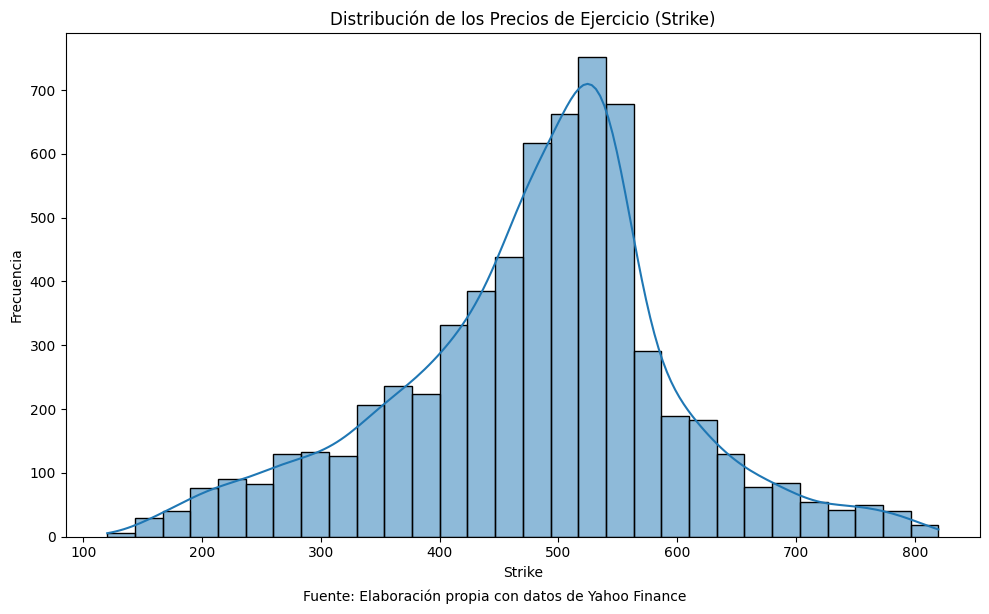

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sp500_options['strike'], bins=30, kde=True)
plt.title('Distribución de los Precios de Ejercicio (Strike)')
plt.xlabel('Strike')
plt.ylabel('Frecuencia')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

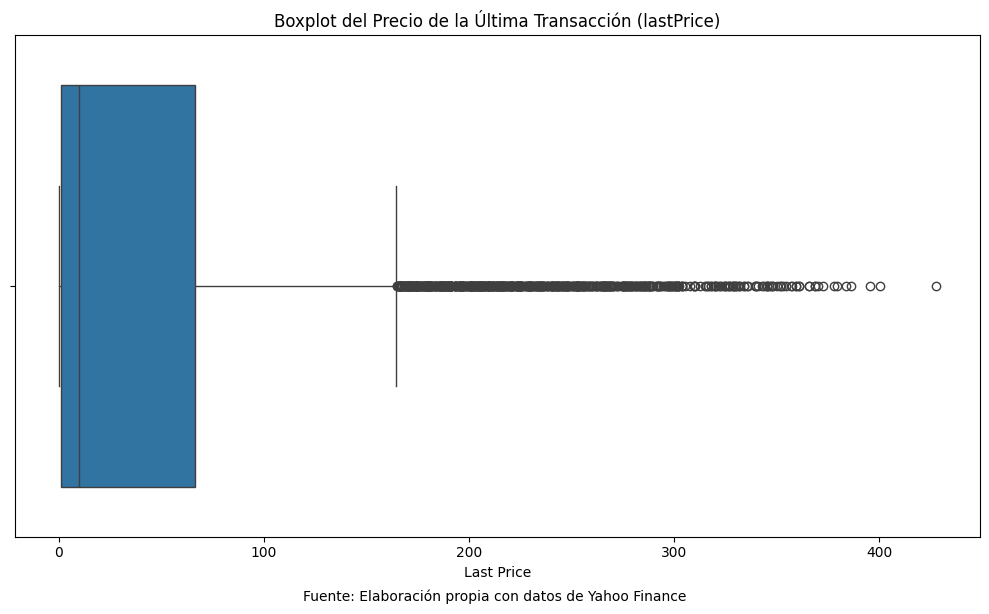

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sp500_options['lastPrice'])
plt.title('Boxplot del Precio de la Última Transacción (lastPrice)')
plt.xlabel('Last Price')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

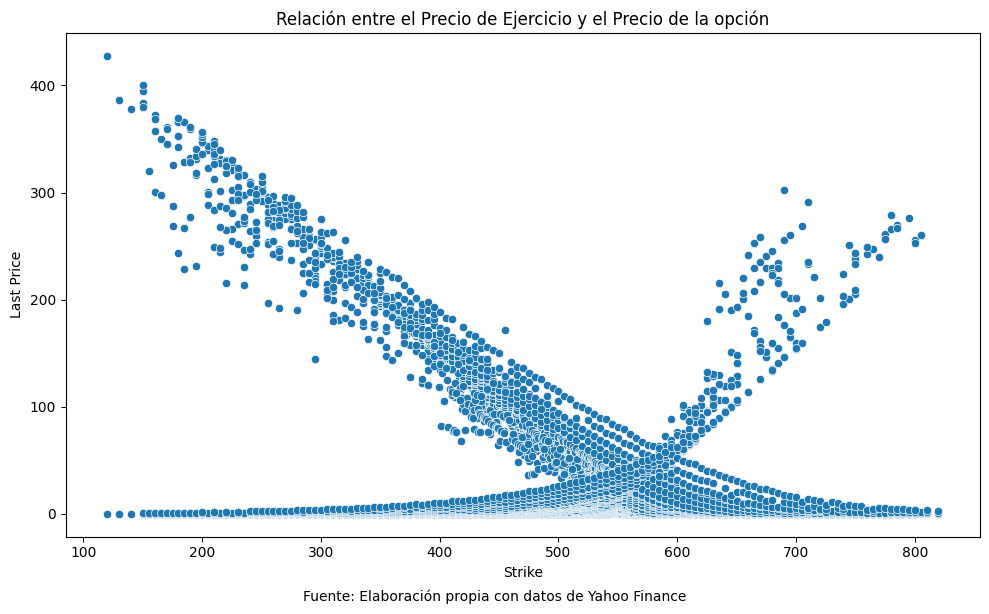

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sp500_options['strike'], y=sp500_options['lastPrice'])
plt.title('Relación entre el Precio de Ejercicio y el Precio de la opción')
plt.xlabel('Strike')
plt.ylabel('Last Price')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

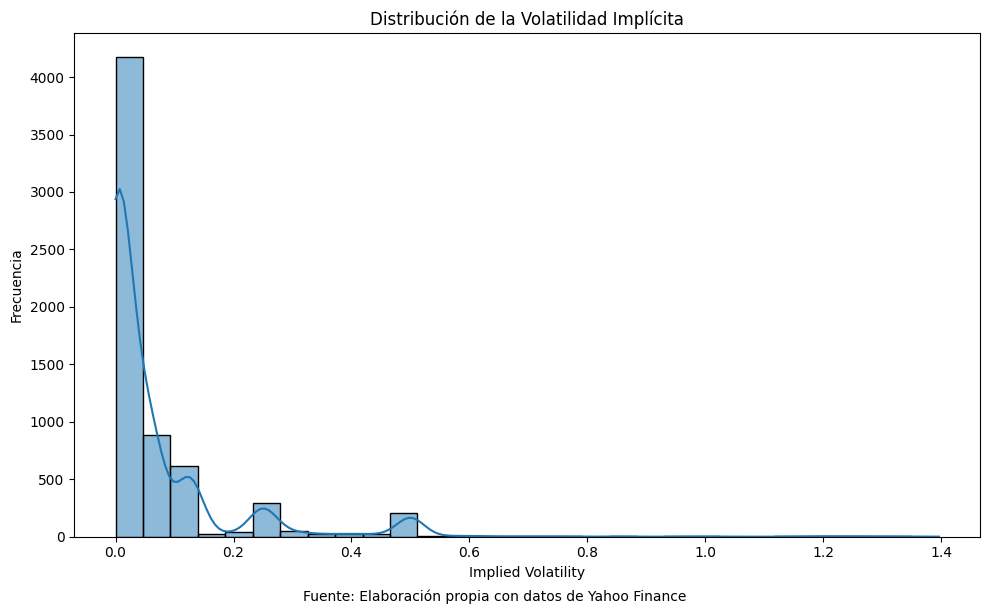

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sp500_options['impliedVolatility'], bins=30, kde=True)
plt.title('Distribución de la Volatilidad Implícita')
plt.xlabel('Implied Volatility')
plt.ylabel('Frecuencia')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

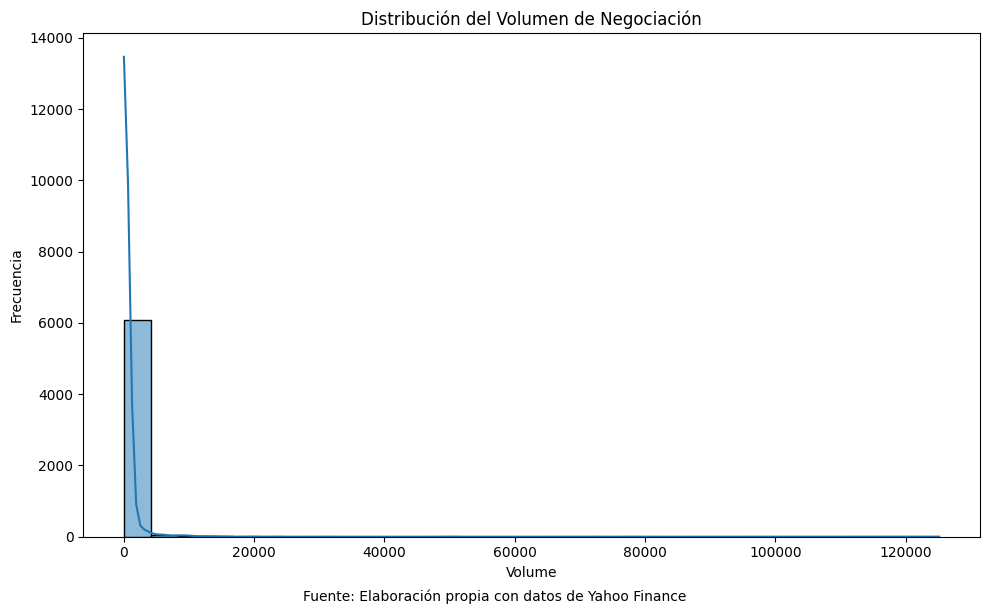

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sp500_options['volume'], bins=30, kde=True)
plt.title('Distribución del Volumen de Negociación')
plt.xlabel('Volume')
plt.ylabel('Frecuencia')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

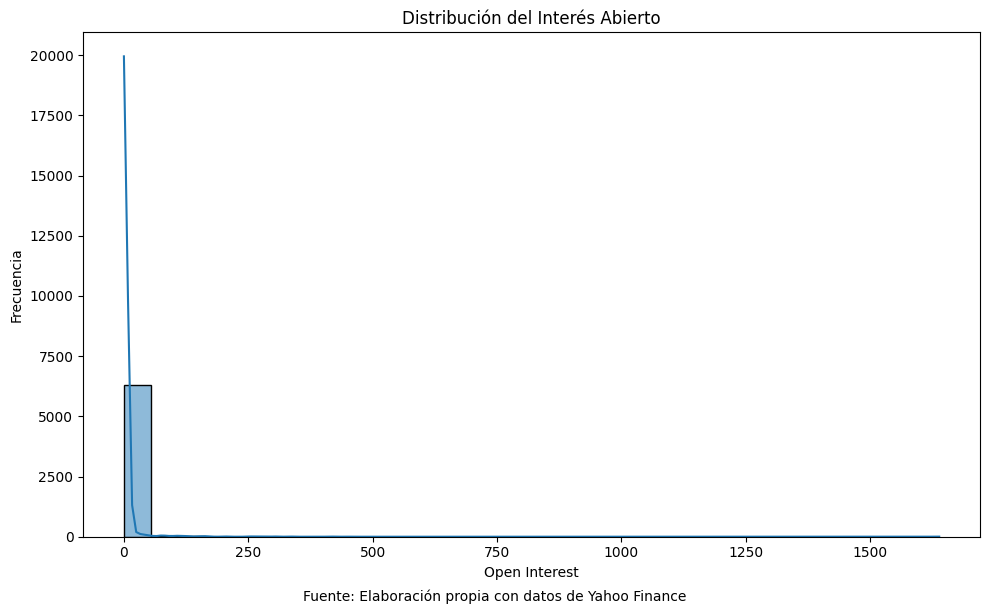

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sp500_options['openInterest'], bins=30, kde=True)
plt.title('Distribución del Interés Abierto')
plt.xlabel('Open Interest')
plt.ylabel('Frecuencia')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

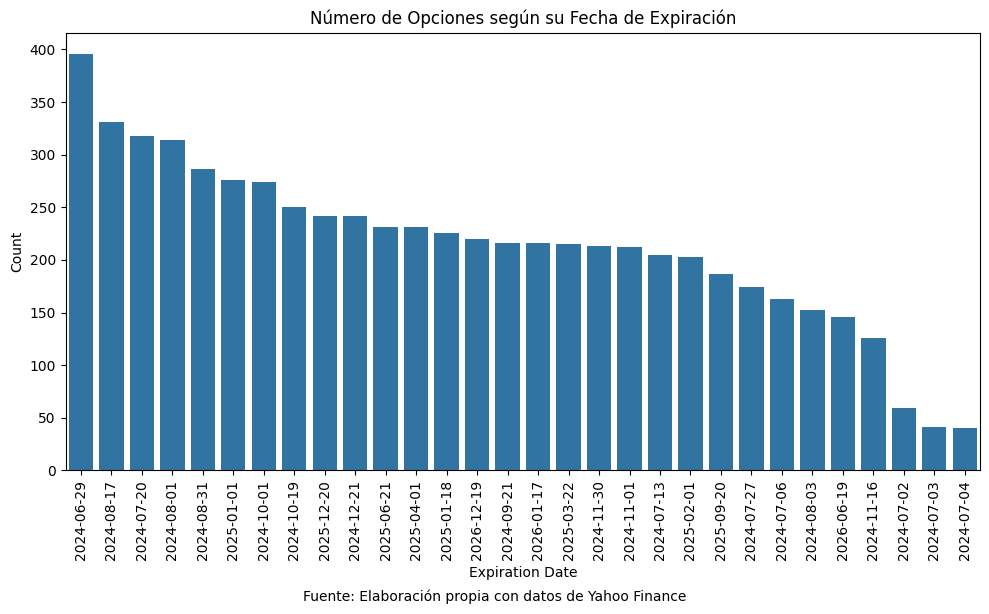

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=sp500_options['expirationDate'].dt.date, order=sp500_options['expirationDate'].dt.date.value_counts().index)
plt.title('Número de Opciones según su Fecha de Expiración')
plt.xlabel('Expiration Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

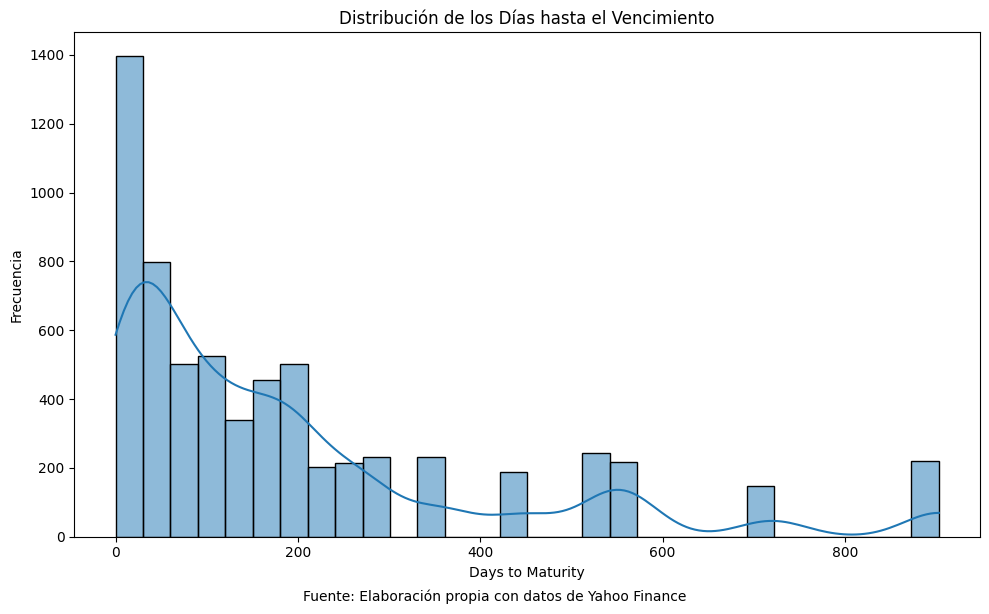

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sp500_options['days_to_maturity'], bins=30, kde=True)
plt.title('Distribución de los Días hasta el Vencimiento')
plt.xlabel('Days to Maturity')
plt.ylabel('Frecuencia')
plt.figtext(0.5, -0.01, 'Fuente: Elaboración propia con datos de Yahoo Finance', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

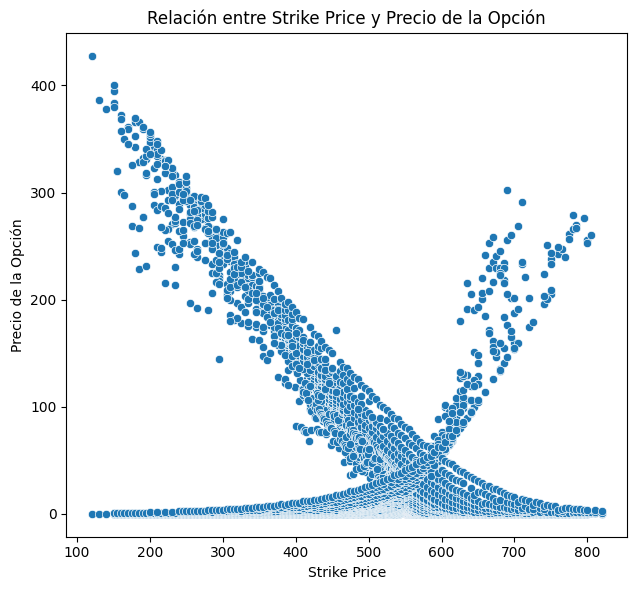

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'sp500_options' es tu DataFrame y ya ha sido cargado correctamente

# Configuración de la figura
plt.figure(figsize=(18, 6))

# Gráfico 1: Relación entre Strike Price y Precio de la Opción
plt.subplot(1, 3, 1)
sns.scatterplot(data=sp500_options, x='strike', y='lastPrice')
plt.title('Relación entre Strike Price y Precio de la Opción')
plt.xlabel('Strike Price')
plt.ylabel('Precio de la Opción')



plt.tight_layout()
plt.show()

In [ ]:
# !pip install missingno
import missingno as msno

sp500_options.isna().sum()/sp500_options.shape[0]

contractSymbol       0.000000
lastTradeDate        0.000000
strike               0.000000
lastPrice            0.000000
bid                  0.000000
ask                  0.000000
change               0.000000
percentChange        0.000000
volume               0.032319
openInterest         0.000312
impliedVolatility    0.000000
inTheMoney           0.000000
contractSize         0.000000
currency             0.000000
expirationDate       0.000000
days_to_maturity     0.000000
dte                  0.000000
underlying_price     0.000000
CALL                 0.000000
mark                 0.000000
dtype: float64

In [ ]:
sp500_options.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDate,days_to_maturity,dte,underlying_price,CALL,mark
6400,SPY261218P00760000,2024-03-01 16:00:48+00:00,760.0,249.30,234.00,239.00,0.0,0.0,1.0,0.0,0.240608,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,236.500
6401,SPY261218P00775000,2024-05-07 17:44:46+00:00,775.0,256.98,238.13,243.00,0.0,0.0,1.0,0.0,0.204041,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,240.565
6402,SPY261218P00780000,2024-05-06 13:43:18+00:00,780.0,265.98,0.00,252.31,0.0,0.0,1.0,0.0,0.224899,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,126.155
6403,SPY261218P00785000,2024-04-03 13:36:19+00:00,785.0,266.70,271.39,276.00,0.0,0.0,1.0,0.0,0.296043,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,273.695
6404,SPY261218P00800000,2024-06-27 18:48:12+00:00,800.0,253.34,0.00,0.00,0.0,0.0,50.0,0.0,0.000010,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,0.000


In [ ]:
# msno.matrix(sp500_options)

# Analisis descriptivo


In [ ]:
sp500_options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDate,days_to_maturity,dte,underlying_price,CALL,mark
0,SPY240628C00300000,2024-06-24 15:41:06+00:00,300.0,246.36,0.00,0.00,0.0,0.0,26.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
1,SPY240628C00305000,2024-06-24 15:41:32+00:00,305.0,241.36,0.00,0.00,0.0,0.0,120.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
2,SPY240628C00310000,2024-06-24 16:42:27+00:00,310.0,235.84,0.00,0.00,0.0,0.0,34.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
3,SPY240628C00315000,2024-06-21 14:12:14+00:00,315.0,229.47,0.00,0.00,0.0,0.0,32.0,0.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,0.000
4,SPY240628C00320000,2024-03-19 13:49:58+00:00,320.0,196.63,182.45,183.15,0.0,0.0,4.0,41.0,0.000010,True,REGULAR,USD,2024-06-29,0,0.000000,546.369995,True,182.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,SPY261218P00760000,2024-03-01 16:00:48+00:00,760.0,249.30,234.00,239.00,0.0,0.0,1.0,0.0,0.240608,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,236.500
6401,SPY261218P00775000,2024-05-07 17:44:46+00:00,775.0,256.98,238.13,243.00,0.0,0.0,1.0,0.0,0.204041,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,240.565
6402,SPY261218P00780000,2024-05-06 13:43:18+00:00,780.0,265.98,0.00,252.31,0.0,0.0,1.0,0.0,0.224899,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,126.155
6403,SPY261218P00785000,2024-04-03 13:36:19+00:00,785.0,266.70,271.39,276.00,0.0,0.0,1.0,0.0,0.296043,True,REGULAR,USD,2026-12-19,903,2.473973,546.369995,False,273.695


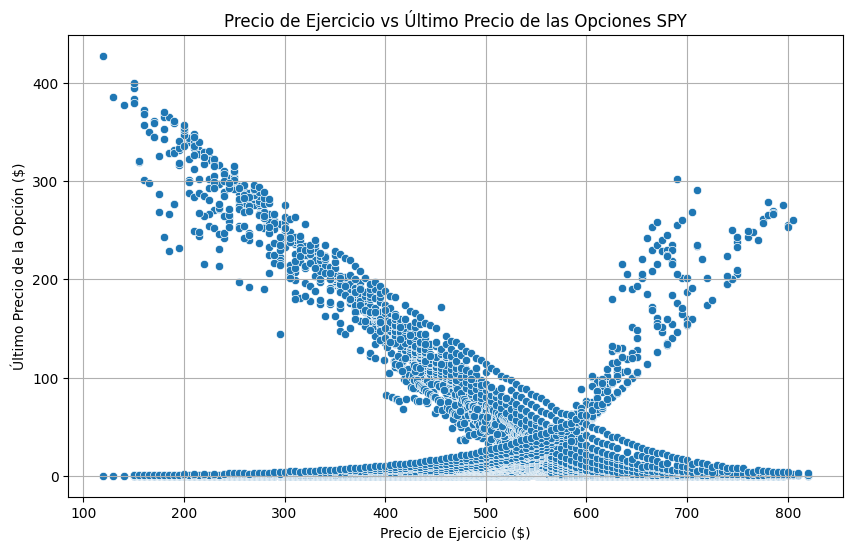

In [ ]:
# Gráfico de dispersión: Strike vs Last Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike', y='lastPrice', data=sp500_options)
plt.title('Precio de Ejercicio vs Último Precio de las Opciones SPY')
plt.xlabel('Precio de Ejercicio ($)')
plt.ylabel('Último Precio de la Opción ($)')
plt.grid(True)
plt.show()


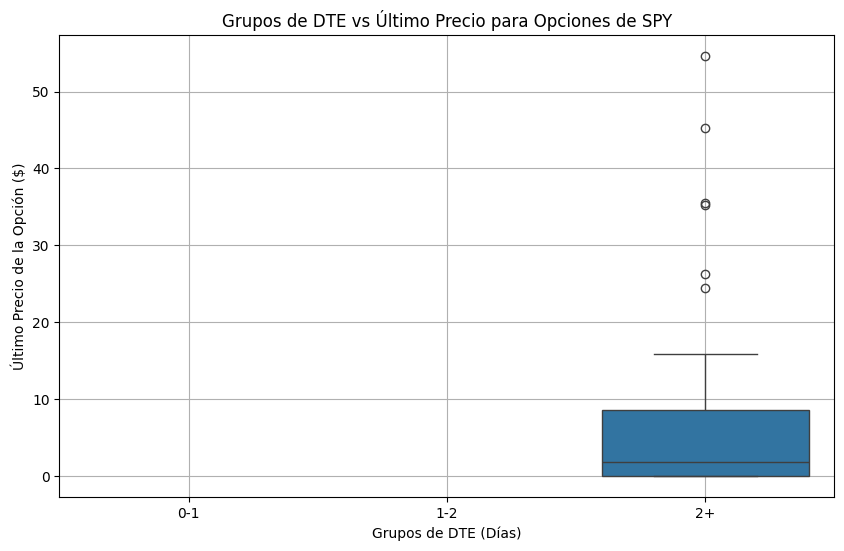

In [ ]:
# Gráfico Boxplot: Días hasta la expiración (DTE) vs Last Price
# Crear categorías de DTE
sp500_options['DTE_category'] = pd.cut(sp500_options['days_to_maturity'], bins=[0, 1, 2, 3], labels=['0-1', '1-2', '2+'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='DTE_category', y='lastPrice', data=sp500_options)
plt.title('Grupos de DTE vs Último Precio para Opciones de SPY')
plt.xlabel('Grupos de DTE (Días)')
plt.ylabel('Último Precio de la Opción ($)')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np

# correlation_matrix = sp500_options[['strike', 'lastPrice', 'volume', 'dte', 'underlying_price', 'CALL']].corr()
sp500_options
# Select only numeric columns for correlation calculation
numeric_sp500_options = sp500_options.select_dtypes(include=[np.float64])

numeric_sp500_options = numeric_sp500_options.drop(columns=['underlying_price'])

# Calculate the correlation matrix on numeric columns only
correlation_matrix = numeric_sp500_options.corr()

correlation_matrix

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,dte,mark
strike,1.000000,-0.365882,-0.201650,-0.198356,NaN,NaN,0.040821,-0.066937,-0.186935,0.007459,-0.200098
lastPrice,-0.365882,1.000000,0.543825,0.545069,NaN,NaN,-0.063135,0.053214,-0.034169,0.190859,0.544743
bid,-0.201650,0.543825,1.000000,0.997863,NaN,NaN,-0.024685,0.148829,0.302267,0.136551,0.999458
ask,-0.198356,0.545069,0.997863,1.000000,NaN,NaN,-0.024788,0.148856,0.303675,0.140135,0.999474
change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentChange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume,0.040821,-0.063135,-0.024685,-0.024788,NaN,NaN,1.000000,-0.009831,-0.020197,-0.078825,-0.024752
openInterest,-0.066937,0.053214,0.148829,0.148856,NaN,NaN,-0.009831,1.000000,0.068430,-0.004931,0.148922
impliedVolatility,-0.186935,-0.034169,0.302267,0.303675,NaN,NaN,-0.020197,0.068430,1.000000,-0.054780,0.303138
dte,0.007459,0.190859,0.136551,0.140135,NaN,NaN,-0.078825,-0.004931,-0.054780,1.000000,0.138430


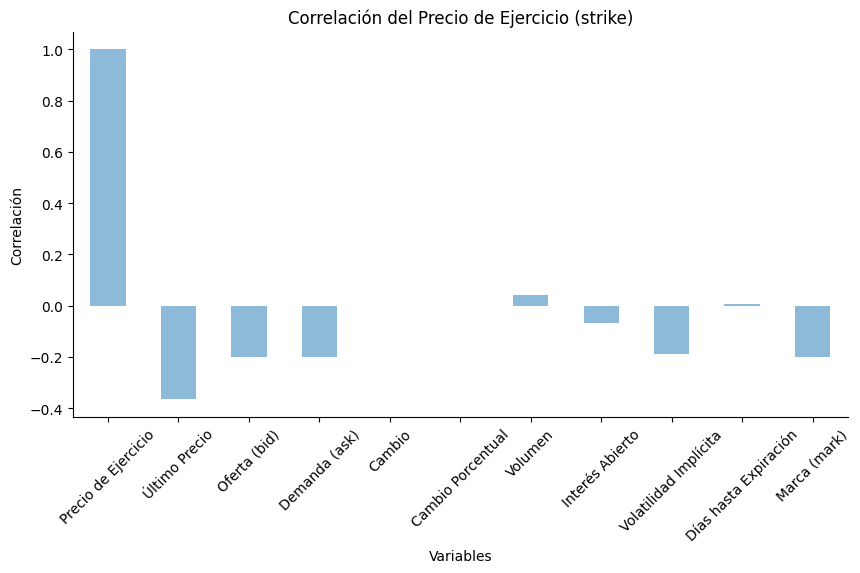

In [ ]:
from matplotlib import pyplot as plt
# correlation_matrix['strike'].plot(kind='line', figsize=(8, 4), title='strike')
# plt.gca().spines[['top', 'right']].set_visible(False)

# Graficar la serie 'strike'
correlation_matrix['strike'].plot(kind='bar', figsize=(10, 5), title='Correlación del Precio de Ejercicio (strike)', alpha = .5)  # Aumenta el tamaño del gráfico

# Configuraciones del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Correlación del Precio de Ejercicio (strike)')
plt.xlabel('Variables')
plt.ylabel('Correlación')

# Definir explícitamente las etiquetas del eje x en español y rotarlas
etiquetas_eje_x = [
    'Precio de Ejercicio',  # strike
    'Último Precio',        # lastPrice
    'Oferta (bid)',         # bid
    'Demanda (ask)',        # ask
    'Cambio',               # change
    'Cambio Porcentual',    # percentChange
    'Volumen',              # volume
    'Interés Abierto',      # openInterest
    'Volatilidad Implícita',# impliedVolatility
    'Días hasta Expiración',# dte
    'Marca (mark)'          # mark
]
# tick_positions = range(0, len(etiquetas_eje_x) * 2, 2)
tick_positions = range(0, len(etiquetas_eje_x), 1)
plt.xticks(ticks=tick_positions, labels=etiquetas_eje_x, rotation=45)  # Rota las etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

In [ ]:
correlation_matrix['lastPrice']

strike              -0.365882
lastPrice            1.000000
bid                  0.543825
ask                  0.545069
change                    NaN
percentChange             NaN
volume              -0.063135
openInterest         0.053214
impliedVolatility   -0.034169
dte                  0.190859
mark                 0.544743
Name: lastPrice, dtype: float64

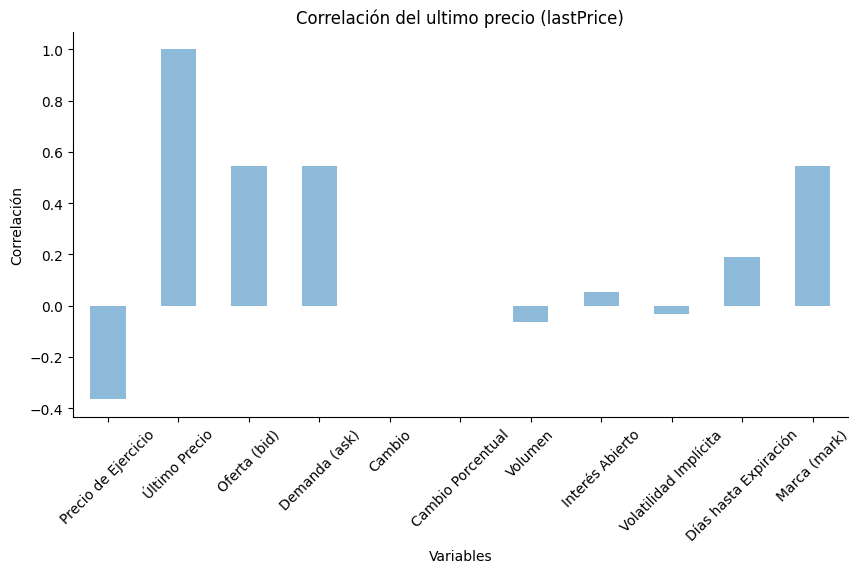

In [ ]:
from matplotlib import pyplot as plt
# correlation_matrix['lastPrice'].plot(kind='line', figsize=(8, 4), title='lastPrice')
# plt.gca().spines[['top', 'right']].set_visible(False)

# Graficar la serie 'strike'
correlation_matrix['lastPrice'].plot(kind='bar', figsize=(10, 5), title='Correlación del ultimo precio (lastPrice)', alpha = .5)  # Aumenta el tamaño del gráfico

# Configuraciones del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Correlación del ultimo precio (lastPrice)')
plt.xlabel('Variables')
plt.ylabel('Correlación')

# Definir explícitamente las etiquetas del eje x en español y rotarlas
etiquetas_eje_x = [
    'Precio de Ejercicio',  # strike
    'Último Precio',        # lastPrice
    'Oferta (bid)',         # bid
    'Demanda (ask)',        # ask
    'Cambio',               # change
    'Cambio Porcentual',    # percentChange
    'Volumen',              # volume
    'Interés Abierto',      # openInterest
    'Volatilidad Implícita',# impliedVolatility
    'Días hasta Expiración',# dte
    'Marca (mark)'          # mark
]
# tick_positions = range(0, len(etiquetas_eje_x) * 2, 2)
tick_positions = range(0, len(etiquetas_eje_x), 1)
plt.xticks(ticks=tick_positions, labels=etiquetas_eje_x, rotation=45)  # Rota las etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

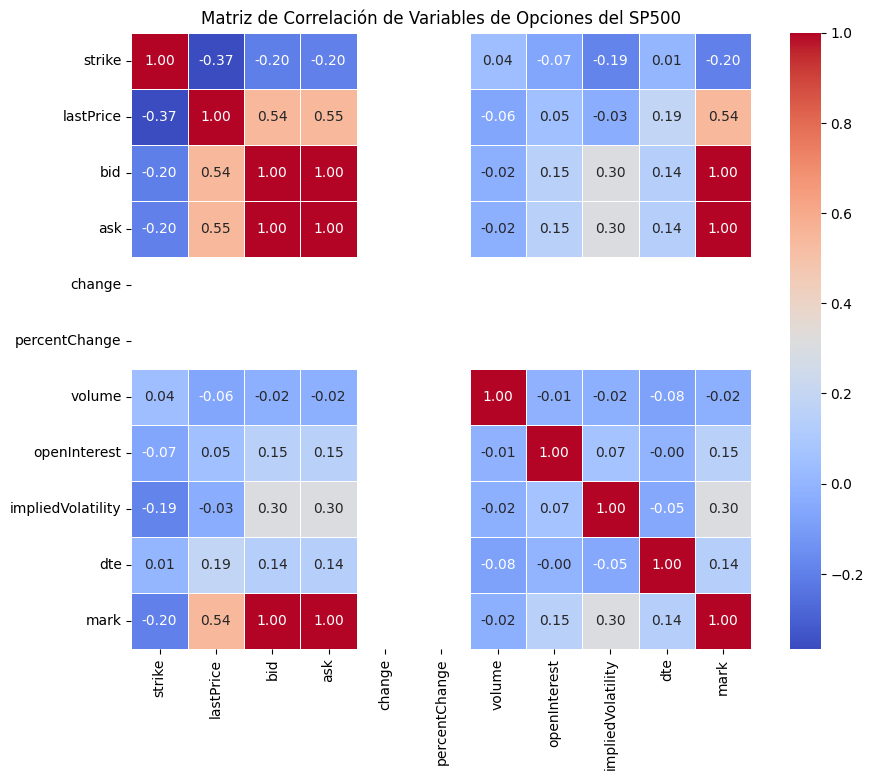

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables de Opciones del SP500')
plt.show()


Estacionalidad del indice


In [ ]:
pip install pandas matplotlib seaborn yfinance statsmodels


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
# Descargar los datos
spy_data = yf.download('SPY', start="2010-01-01", end="2022-12-31")

# Usamos solo el precio de cierre ajustado
spy_data[['Cierre Ajustado']] = spy_data[['Adj Close']]
spy_data = spy_data[['Cierre Ajustado']]

# Revisar los primeros datos
print(spy_data.head())

[*********************100%%**********************]  1 of 1 completed

            Cierre Ajustado
Date                       
2010-01-04        86.580719
2010-01-05        86.809929
2010-01-06        86.871033
2010-01-07        87.237755
2010-01-08        87.528076


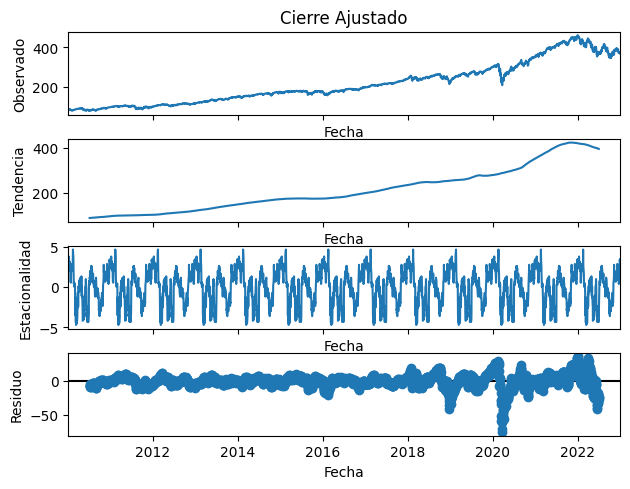

In [ ]:
# Descomposición de la serie temporal
decomposition = seasonal_decompose(spy_data['Cierre Ajustado'], model='additive', period=252)  # Usando datos diarios, period es aprox. un año
fig = decomposition.plot()
fig.axes[0].set_ylabel('Observado')
fig.axes[1].set_ylabel('Tendencia')
fig.axes[2].set_ylabel('Estacionalidad')
fig.axes[3].set_ylabel('Residuo')
fig.axes[0].set_xlabel('Fecha')
fig.axes[1].set_xlabel('Fecha')
fig.axes[2].set_xlabel('Fecha')
fig.axes[3].set_xlabel('Fecha')
plt.show()

In [ ]:
spy_data

,Cierre Ajustado
Date,
2010-01-04,86.580719
2010-01-05,86.809929
2010-01-06,86.871033
2010-01-07,87.237755
2010-01-08,87.528076
...,...
2022-12-23,374.799957
2022-12-27,373.321960
2022-12-28,368.682373


In [ ]:
spy_data.describe()

,Cierre Ajustado,Mes,Rendimientos Diarios,Volatilidad
count,3272.000000,3272.000000,3271.000000,3242.000000
mean,214.874675,6.546760,0.000509,0.151230
std,102.653678,3.425713,0.011094,0.092026
min,78.772301,1.000000,-0.109423,0.035160
25%,127.421543,4.000000,-0.003731,0.095905
50%,183.192490,7.000000,0.000654,0.124931
75%,270.546127,10.000000,0.005748,0.183107
max,460.127380,12.000000,0.090603,0.821383


<ipython-input-40-4b1db57cc912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_data['Mes'] = spy_data.index.month


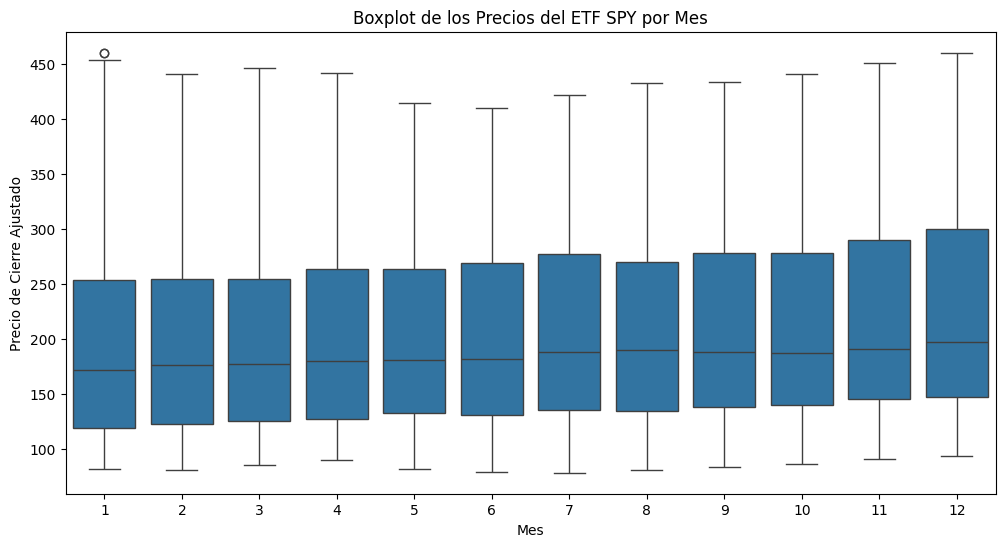

In [ ]:
# Extraer el mes del índice de fecha
spy_data['Mes'] = spy_data.index.month

# Crear un boxplot por mes
plt.figure(figsize=(12, 6))
sns.boxplot(data=spy_data, x='Mes', y='Cierre Ajustado')
plt.title('Boxplot de los Precios del ETF SPY por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio de Cierre Ajustado')
plt.show()


<ipython-input-41-d64aec2fc679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_data['Rendimientos Diarios'] = spy_data['Cierre Ajustado'].pct_change()
<ipython-input-41-d64aec2fc679>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_data['Volatilidad'] = spy_data['Rendimientos Diarios'].rolling(window=30).std() * (252**0.5)  # Anualizada


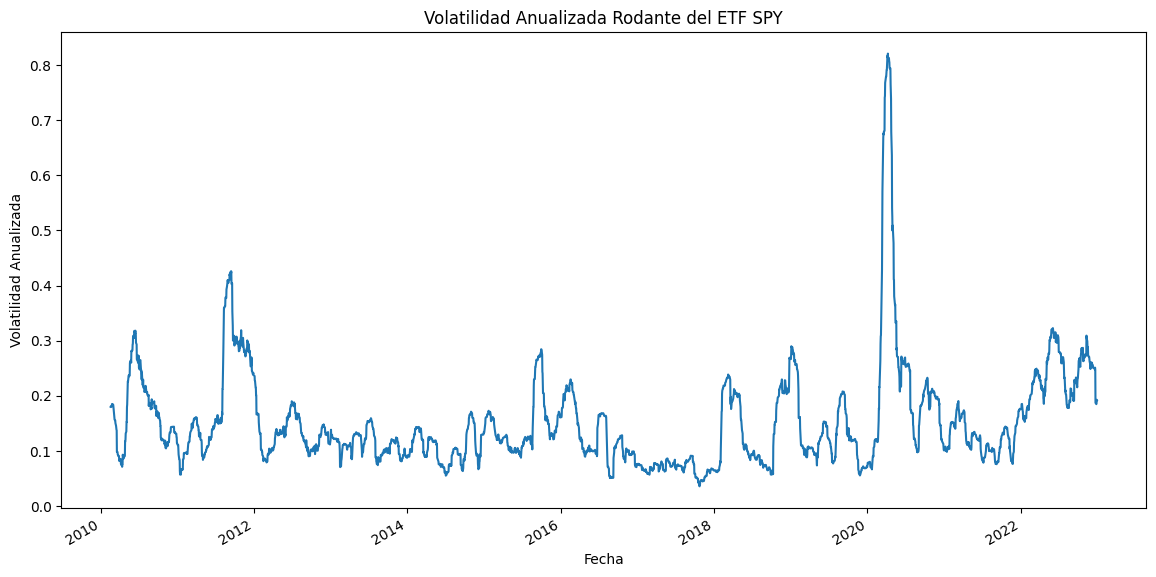

In [ ]:
# Calcular rendimientos diarios
spy_data['Rendimientos Diarios'] = spy_data['Cierre Ajustado'].pct_change()

# Calcular la volatilidad móvil (ventana de 30 días)
spy_data['Volatilidad'] = spy_data['Rendimientos Diarios'].rolling(window=30).std() * (252**0.5)  # Anualizada

# Graficar la volatilidad
plt.figure(figsize=(14, 7))
spy_data['Volatilidad'].plot()
plt.title('Volatilidad Anualizada Rodante del ETF SPY')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad Anualizada')
plt.show()


# Calibración de Black Scholes

In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S, X, T, r, sigma, eps=1e-8):
    # Esta funcion calcula el precio de una opcion europea de compra
    T = max(T,eps)
    sigma = max(sigma,eps)
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, X, T, r, sigma, eps=1e-8):
    #Esta funcion calcula el precio de una opcion europea de venta
    T = max(T,eps)
    sigma = max(sigma,eps)
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = X * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

def black_scholes_greeks(S, X, T, r, sigma, option_type='call', eps=1e-8):
    T = max(T, eps)
    sigma = max(sigma, eps)
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        delta = norm.cdf(d1)
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
                 - r * X * np.exp(-r * T) * norm.cdf(d2))
    else:
        delta = -norm.cdf(-d1)
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
                 + r * X * np.exp(-r * T) * norm.cdf(-d2))

    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    rho = X * T * np.exp(-r * T) * (norm.cdf(d2) if option_type == 'call' else -norm.cdf(-d2))

    return {
        'delta': delta,
        'gamma': gamma,
        'vega': vega,
        'theta': theta,
        'rho': rho
    }


In [ ]:
from typing_extensions import dataclass_transform
def error_function(params, S0, data):
    sigma = params[0]
    total_error = 0
    for index, row in data.iterrows():
        S = row["underlying_price"]
        X = row["strike"]
        T = row["dte"]
        r = tasa_libre_riesgo
        market_price = row["lastPrice"]
        option_type = row["CALL"]
        if option_type == True:
            model_price = black_scholes_call(S, X, T, r, sigma)
        else:
            model_price = black_scholes_put(S, X, T, r, sigma)

        total_error += (market_price - model_price)**2
    total_error = total_error/data.shape[0]
    print('Error de tanto: '+str(total_error)+ ' para esta volatilidad '+str(sigma))
    return total_error


In [ ]:
from scipy.optimize import minimize

S0 = price
# Optimización
#initial_guess = [0.2]  # Suposición inicial para la volatilidad
initial_guess = [0.2]  # Suposición inicial para la volatilidad
result = minimize(error_function, initial_guess, args=(S0, sp500_options), options={'maxiter':1000, 'disp':True}, bounds=[(0, None)])

# Volatilidad óptima
optimal_volatility = result.x[0]
print(f"Volatilidad óptima: {optimal_volatility:.2%}")


Error de tanto: 220.30646219482216 para esta volatilidad 0.2
Error de tanto: 220.306466366277 para esta volatilidad 0.20000001
Error de tanto: 322.12785972538893 para esta volatilidad 0.0
Error de tanto: 322.12785972538893 para esta volatilidad 1e-08
Error de tanto: 215.79112024954665 para esta volatilidad 0.18062527213594354
Error de tanto: 215.79112080976816 para esta volatilidad 0.18062528213594353
Error de tanto: 215.7013156492159 para esta volatilidad 0.1776196122157713
Error de tanto: 215.70131568841475 para esta volatilidad 0.1776196222157713
Error de tanto: 215.70086751632016 para esta volatilidad 0.1773934830494473
Error de tanto: 215.7008675167696 para esta volatilidad 0.1773934930494473
Error de tanto: 215.7008674575531 para esta volatilidad 0.1773908603057929
Error de tanto: 215.70086745755293 para esta volatilidad 0.1773908703057929
Volatilidad óptima: 17.74%


In [ ]:
result.message

'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

In [ ]:
error_function([17.32/100], S0, data=sp500_options)


Error de tanto: 215.849682747368 para esta volatilidad 0.1732


215.849682747368

In [ ]:
greeks_list = []
for index, row in sp500_options.iterrows():
    S = row["underlying_price"]
    X = row["strike"]
    T = row["dte"]
    r = tasa_libre_riesgo  # Ajusta según la tasa de interés actual
    sigma = optimal_volatility
    option_type = 'call' if row["CALL"] else 'put'

    greeks = black_scholes_greeks(S, X, T, r, sigma, option_type)
    greeks_list.append(greeks)

In [ ]:
# Convertir resultados a un DataFrame y combinarlos con los datos originales
greeks_df = pd.DataFrame(greeks_list)
combined_data = pd.concat([sp500_options, greeks_df], axis=1)

print(greeks_df)
greeks_df

         delta     gamma        vega      theta          rho
0     1.000000  0.000000    0.000000 -11.877000     0.000003
1     1.000000  0.000000    0.000000 -12.074950     0.000003
2     1.000000  0.000000    0.000000 -12.272900     0.000003
3     1.000000  0.000000    0.000000 -12.470850     0.000003
4     1.000000  0.000000    0.000000 -12.668800     0.000003
...        ...       ...         ...        ...          ...
6400 -0.755614  0.002059  269.793176  13.088054 -1422.301297
6401 -0.777063  0.001957  256.392710  14.486261 -1479.653319
6402 -0.783879  0.001922  251.860290  14.949425 -1498.442170
6403 -0.790530  0.001888  247.306035  15.410745 -1517.066822
6404 -0.809512  0.001783  233.572903  16.781537 -1571.960366

[6405 rows x 5 columns]


,delta,gamma,vega,theta,rho
0,1.000000,0.000000,0.000000,-11.877000,0.000003
1,1.000000,0.000000,0.000000,-12.074950,0.000003
2,1.000000,0.000000,0.000000,-12.272900,0.000003
3,1.000000,0.000000,0.000000,-12.470850,0.000003
4,1.000000,0.000000,0.000000,-12.668800,0.000003
...,...,...,...,...,...
6400,-0.755614,0.002059,269.793176,13.088054,-1422.301297
6401,-0.777063,0.001957,256.392710,14.486261,-1479.653319
6402,-0.783879,0.001922,251.860290,14.949425,-1498.442170
6403,-0.790530,0.001888,247.306035,15.410745,-1517.066822


In [ ]:
greeks_df.describe()

,delta,gamma,vega,theta,rho
count,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000
mean,0.265727,0.003741,58.574258,-21.307760,38.051739
std,0.547677,0.006039,74.724065,29.050856,195.916007
min,-1.000000,0.000000,0.000000,-223.992321,-1571.960366
25%,-0.051221,0.000014,0.210401,-27.460710,-5.255234
50%,0.005965,0.001776,26.636393,-14.648300,0.000004
75%,0.877997,0.004551,91.594013,-2.545705,83.754067
max,1.000000,0.045360,342.829427,28.034398,827.593905


In [ ]:
greeks_df['delta']

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
6400   -0.755614
6401   -0.777063
6402   -0.783879
6403   -0.790530
6404   -0.809512
Name: delta, Length: 6405, dtype: float64

In [ ]:
calibrated_volatilities = []
call_prices = []
put_prices = []
data = []
# Calibrar la volatilidad implícita y calcular los precios de las opciones
for index, row in sp500_options.iterrows():
    S = row['underlying_price']
    X = row['strike']
    T = row['dte']
    market_price = row['lastPrice']
    sigma = optimal_volatility
    option_type = 'call' if row['CALL'] else 'put'


    r=tasa_libre_riesgo
    # Calcular precios de las opciones usando la volatilidad calibrada
    call_price = black_scholes_call(S, X, T, r, sigma)
    put_price = black_scholes_put(S, X, T, r, sigma)

    # Guardar los precios calculados
    call_prices.append(call_price)
    put_prices.append(put_price)

# Añadir los resultados al DataFrame original
sp500_options['calculated_call_price'] = call_prices
sp500_options['calculated_put_price'] = put_prices

In [ ]:
sp500_options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,currency,expirationDate,days_to_maturity,dte,underlying_price,CALL,mark,DTE_category,calculated_call_price,calculated_put_price
0,SPY240628C00300000,2024-06-24 15:41:06+00:00,300.0,246.36,0.00,0.00,0.0,0.0,26.0,0.0,...,USD,2024-06-29,0,0.000000,546.369995,True,0.000,NaN,246.369995,0.000000
1,SPY240628C00305000,2024-06-24 15:41:32+00:00,305.0,241.36,0.00,0.00,0.0,0.0,120.0,0.0,...,USD,2024-06-29,0,0.000000,546.369995,True,0.000,NaN,241.369995,0.000000
2,SPY240628C00310000,2024-06-24 16:42:27+00:00,310.0,235.84,0.00,0.00,0.0,0.0,34.0,0.0,...,USD,2024-06-29,0,0.000000,546.369995,True,0.000,NaN,236.369995,0.000000
3,SPY240628C00315000,2024-06-21 14:12:14+00:00,315.0,229.47,0.00,0.00,0.0,0.0,32.0,0.0,...,USD,2024-06-29,0,0.000000,546.369995,True,0.000,NaN,231.369995,0.000000
4,SPY240628C00320000,2024-03-19 13:49:58+00:00,320.0,196.63,182.45,183.15,0.0,0.0,4.0,41.0,...,USD,2024-06-29,0,0.000000,546.369995,True,182.800,NaN,226.369995,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,SPY261218P00760000,2024-03-01 16:00:48+00:00,760.0,249.30,234.00,239.00,0.0,0.0,1.0,0.0,...,USD,2026-12-19,903,2.473973,546.369995,False,236.500,NaN,19.339516,162.060879
6401,SPY261218P00775000,2024-05-07 17:44:46+00:00,775.0,256.98,238.13,243.00,0.0,0.0,1.0,0.0,...,USD,2026-12-19,903,2.473973,546.369995,False,240.565,NaN,17.202108,173.523959
6402,SPY261218P00780000,2024-05-06 13:43:18+00:00,780.0,265.98,0.00,252.31,0.0,0.0,1.0,0.0,...,USD,2026-12-19,903,2.473973,546.369995,False,126.155,NaN,16.539280,177.394627
6403,SPY261218P00785000,2024-04-03 13:36:19+00:00,785.0,266.70,271.39,276.00,0.0,0.0,1.0,0.0,...,USD,2026-12-19,903,2.473973,546.369995,False,273.695,NaN,15.900036,181.288878


In [ ]:
tasa_libre_riesgo

0.03959

# Calibración Heston 1993

In [ ]:
import numpy as np

# Supongamos que tienes una función heston_option_price que calcula el precio de la opción en el modelo de Heston
def heston_option_price(S, K, T, r, kappa, theta, sigma, rho, v0, lambd, option_type='call'):
    # Implementa aquí tu función de precio de la opción usando el modelo de Heston
    pass

# Parámetros del modelo de Heston (estos valores son solo un ejemplo)
S = 100  # Precio del subyacente
K = 100  # Strike price
T = 1.0  # Tiempo a vencimiento
r = 0.05  # Tasa libre de riesgo
kappa = 2.0  # Velocidad de reversión
theta = 0.02  # Valor a largo plazo de la varianza
sigma = 0.1  # Volatilidad de la volatilidad
rho = -0.5  # Correlación entre el subyacente y su volatilidad
v0 = 0.04  # Varianza inicial
lambd = 0.0  # Ajuste de riesgo de mercado

# Incrementos para las derivadas numéricas
dS = 0.01
dT = 1 / 365  # Un día
dr = 0.01
dV = 0.01

# Precio base de la opción
price = heston_option_price(S, K, T, r, kappa, theta, sigma, rho, v0, lambd)

# Delta
price_up = heston_option_price(S + dS, K, T, r, kappa, theta, sigma, rho, v0, lambd)
price_down = heston_option_price(S - dS, K, T, r, kappa, theta, sigma, rho, v0, lambd)
delta = (price_up - price_down) / (2 * dS)

# Gamma
gamma = (price_up - 2 * price + price_down) / (dS ** 2)

# Vega
price_vol_up = heston_option_price(S, K, T, r, kappa, theta, sigma + dV, rho, v0, lambd)
price_vol_down = heston_option_price(S, K, T, r, kappa, theta, sigma - dV, rho, v0, lambd)
vega = (price_vol_up - price_vol_down) / (2 * dV)

# Theta
price_time_up = heston_option_price(S, K, T - dT, r, kappa, theta, sigma, rho, v0, lambd)
theta = (price_time_up - price) / dT

# Rho
price_rate_up = heston_option_price(S, K, T, r + dr, kappa, theta, sigma, rho, v0, lambd)
price_rate_down = heston_option_price(S, K, T, r - dr, kappa, theta, sigma, rho, v0, lambd)
rho = (price_rate_up - price_rate_down) / (2 * dr)

# Imprime las griegas
print(f"Delta: {delta}")
print(f"Gamma: {gamma}")
print(f"Vega: {vega}")
print(f"Theta: {theta}")
print(f"Rho: {rho}")


# Griegas


In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# Datos proporcionados
data = [
    [2.5, 0.01, 0.05, -0.75, 0.01, 251.259],
    [2.5, 0.02, 0.05, -0.75, 0.02, 222.127],
    [2.5, 0.02, 0.25, -0.75, 0.03, 217.977],
    [7.5, 0.04, 0.25, 0, 0.03, 217.657],
    [7.88323867, 0.030630637, 0.283662211, 0.000227687, 0.030232583, 215.271],
    [9.2898861, 0.03537119, 0.326871915, -0.000923482, 0.01242856, 213.695],
    [9.91771152, 0.035314214, 0.370641209, -0.001630808, 0.003708007, 213.614],
    [8.84151788, 0.036410856, 0.786450639, -0.008964997, 0.000287286, 213.055],
    [2.5, 0.03, 0.15, -0.5, 0.01, 211.775],
    [2.5, 0.04, 0.05, -0.5, 0.02, 210.127],
    [2.5, 0.04, 0.25, -0.5, 0.03, 209.645],
    [7.5, 0.01, 0.15, -0.25, 0.01, 209.375],
    [7.5, 0.02, 0.05, -0.25, 0.02, 209.375],
    [7.5, 0.02, 0.25, -0.25, 0.03, 209.375],
    [7.5, 0.03, 0.15, 0.01, 0.01, 209.375],
    [7.5, 0.04, 0.05, 0.02, 0.02, 209.375],
    [7.5, 0.04, 0.25, 0.03, 0.03, 209.375]
]

# Crear un DataFrame
columns = ['kappa_v', 'theta_v', 'sigma_v', 'rho', 'v0', 'MSE']
df = pd.DataFrame(data, columns=columns)

# Assumed parameters
S = 100  # Precio del activo subyacente
K = 100  # Precio de ejercicio
T = 1    # Tiempo hasta el vencimiento en años
r = 0.05  # Tasa libre de riesgo

# Función para calcular d1 y d2
def calculate_d1_d2(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Calcular las griegas para cada fila
df['Delta'] = 0.0
df['Gamma'] = 0.0
df['Vega'] = 0.0
df['Theta'] = 0.0
df['Rho'] = 0.0

for index, row in df.iterrows():
    sigma = row['sigma_v']
    d1, d2 = calculate_d1_d2(S, K, T, r, sigma)

    df.at[index, 'Delta'] = norm.cdf(d1)
    df.at[index, 'Gamma'] = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    df.at[index, 'Vega'] = S * norm.pdf(d1) * np.sqrt(T)
    df.at[index, 'Theta'] = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
                             - r * K * np.exp(-r * T) * norm.cdf(d2))
    df.at[index, 'Rho'] = K * T * np.exp(-r * T) * norm.cdf(d2)

# Mostrar el DataFrame con las griegas calculadas
print(df)

# Extracting only the Greeks for the LaTeX table
greeks_df = df[['Delta', 'Gamma', 'Vega', 'Theta', 'Rho']]

# Generating LaTeX table
latex_table = greeks_df.to_latex(index=False, float_format="%.6f")

latex_table


     kappa_v   theta_v   sigma_v       rho        v0      MSE     Delta  \
0   2.500000  0.010000  0.050000 -0.750000  0.010000  251.259  0.847318   
1   2.500000  0.020000  0.050000 -0.750000  0.020000  222.127  0.847318   
2   2.500000  0.020000  0.250000 -0.750000  0.030000  217.977  0.627409   
3   7.500000  0.040000  0.250000  0.000000  0.030000  217.657  0.627409   
4   7.883239  0.030631  0.283662  0.000228  0.030233  215.271  0.624794   
5   9.289886  0.035371  0.326872 -0.000923  0.012429  213.695  0.624151   
6   9.917712  0.035314  0.370641 -0.001631  0.003708  213.614  0.625600   
7   8.841518  0.036411  0.786451 -0.008965  0.000287  213.055  0.676093   
8   2.500000  0.030000  0.150000 -0.500000  0.010000  211.775  0.658486   
9   2.500000  0.040000  0.050000 -0.500000  0.020000  210.127  0.847318   
10  2.500000  0.040000  0.250000 -0.500000  0.030000  209.645  0.627409   
11  7.500000  0.010000  0.150000 -0.250000  0.010000  209.375  0.658486   
12  7.500000  0.020000  0

'\\begin{tabular}{rrrrr}\n\\toprule\nDelta & Gamma & Vega & Theta & Rho \\\\\n\\midrule\n0.847318 & 0.047185 & 23.592271 & -4.562235 & 79.448572 \\\\\n0.847318 & 0.047185 & 23.592271 & -4.562235 & 79.448572 \\\\\n0.627409 & 0.015137 & 37.841983 & -7.250495 & 50.404947 \\\\\n0.627409 & 0.015137 & 37.841983 & -7.250495 & 50.404947 \\\\\n0.624794 & 0.013370 & 37.926071 & -7.822495 & 48.867967 \\\\\n0.624151 & 0.011609 & 37.946483 & -8.560026 & 47.164125 \\\\\n0.625600 & 0.010226 & 37.900360 & -9.306165 & 45.648943 \\\\\n0.676093 & 0.004570 & 35.941678 & -15.896913 & 35.274704 \\\\\n0.658486 & 0.024469 & 36.703187 & -5.615584 & 57.256893 \\\\\n0.847318 & 0.047185 & 23.592271 & -4.562235 & 79.448572 \\\\\n0.627409 & 0.015137 & 37.841983 & -7.250495 & 50.404947 \\\\\n0.658486 & 0.024469 & 36.703187 & -5.615584 & 57.256893 \\\\\n0.847318 & 0.047185 & 23.592271 & -4.562235 & 79.448572 \\\\\n0.627409 & 0.015137 & 37.841983 & -7.250495 & 50.404947 \\\\\n0.658486 & 0.024469 & 36.703187 & -5.61558